<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import a subset of the character-predictions data set focused on major houses
url = '/Users/ibt119/Code/datascienceclass/sfdat22_work/project/character-predictions-9.csv'
df = pd.read_csv(url, sep=',')

((df['alive'] >= .5) == df['isAlive']).mean()
# Get rid of previous prediction info
df.drop(['actual','pred','alive','plod'],axis=1,inplace=True)
df

,S.No,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,4,0,House Arryn,0,0,0,0,0,1,1,0,0,0,0.183946,0
1,309,0,House Arryn,0,0,0,1,0,1,0,1,1,0,0.080268,1
2,313,0,House Arryn,1,0,0,0,0,0,0,0,0,0,0.006689,1
3,341,1,House Arryn,1,0,0,0,0,0,0,0,0,0,0.003344,1
4,548,1,House Arryn,0,0,0,1,1,0,0,0,0,0,0.016722,1
5,738,0,House Arryn,0,0,0,1,1,0,0,0,0,0,0.013378,1
6,766,0,House Arryn,0,0,0,1,1,0,0,0,0,0,0.010033,1
7,990,0,House Arryn,0,0,1,1,0,0,1,0,0,0,0.083612,0
8,1015,1,House Arryn,0,1,0,1,0,0,1,0,0,0,0.046823,0
9,1118,1,House Arryn,0,0,0,1,0,0,1,1,1,0,0.043478,1


In [ ]:
def get_house(value):
    value = value.lower()
    v = [k for (k, v) in house.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

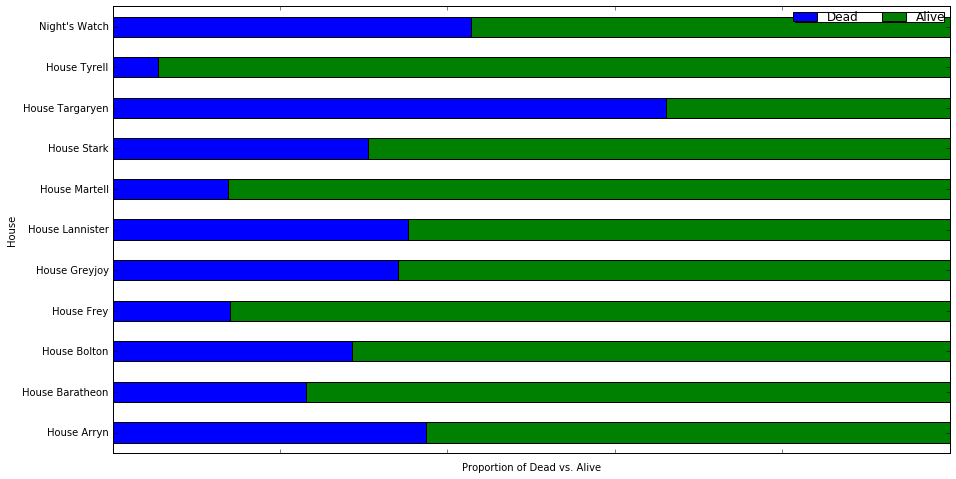

In [ ]:
# Q: Which house has the highest proportion of deaths?
# A: Targaryens. 
data = df.groupby(["house", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 8), width = .5)
_ = p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12., loc = "upper right", ncol = 2, borderpad = -.15)
_ = p.set_ylabel("House"), p.set_xlabel("Proportion of Dead vs. Alive")

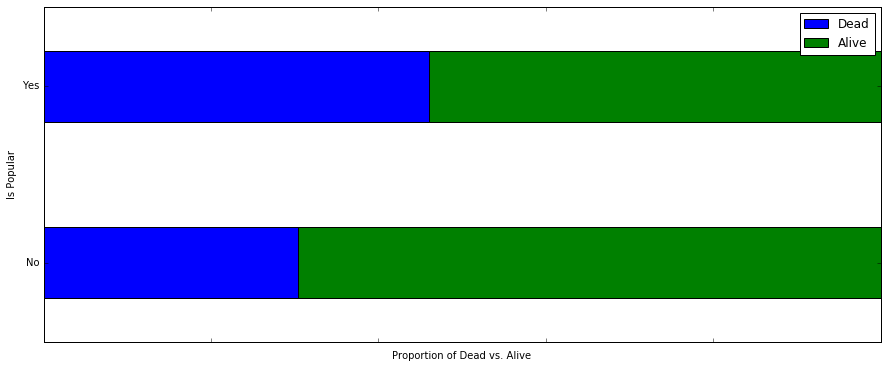

In [ ]:
# Q: Is there a relationship between survival and popularity? 
# A: A higher proportion of popular characters die
data = df.groupby(["isPopular", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 6), width = .4)
_ = p.set_yticklabels(["No", "Yes"]), p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12.)
_ = p.set_ylabel("Is Popular"), p.set_xlabel("Proportion of Dead vs. Alive")

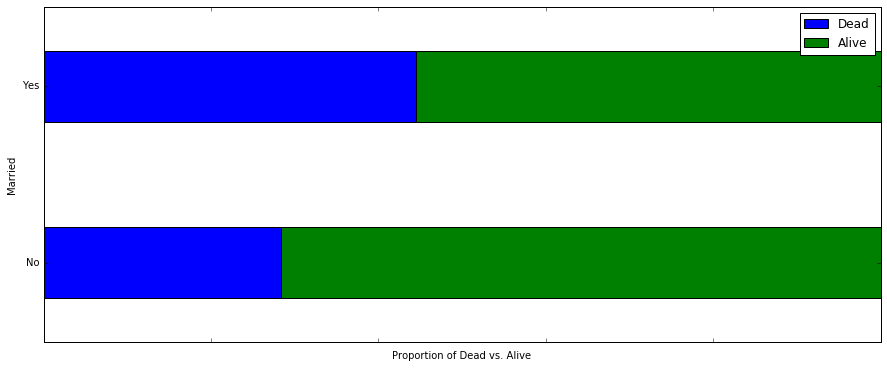

In [ ]:
# Q: Is there a relationship between survial and marriage? 
# A: More of the dead characters were married than single.  
data = df.groupby(["isMarried", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 6), width = .4)
_ = p.set_yticklabels(["No", "Yes"]), p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12.)
_ = p.set_ylabel("Married"), p.set_xlabel("Proportion of Dead vs. Alive")

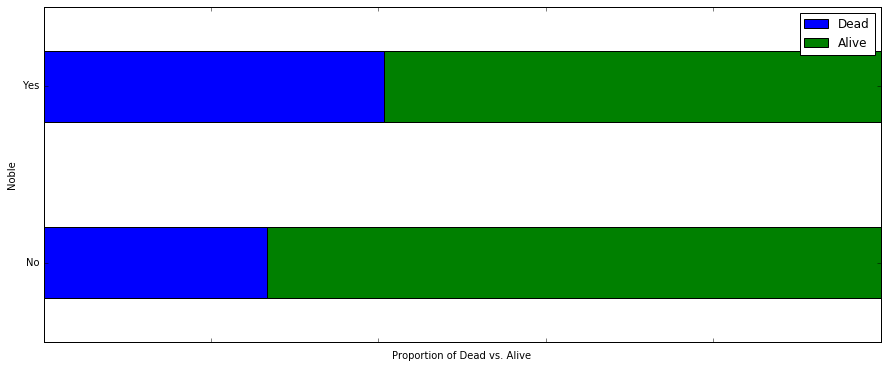

In [ ]:
# Q: Is there a relationship between survial and being noble? 
# A: More of the dead characters were noble.  
data = df.groupby(["isNoble", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 6), width = .4)
_ = p.set_yticklabels(["No", "Yes"]), p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12.)
_ = p.set_ylabel("Noble"), p.set_xlabel("Proportion of Dead vs. Alive")

In [ ]:
### Logistic Regression

# character data
import pandas as pd
url = '/Users/ibt119/Code/datascienceclass/sfdat22_work/project/character-predictions-9.csv'
train = pd.read_csv(url)

In [ ]:
# before splitting, just predict the mean of the entire dataset
na_rate = train['isAlive'].sum()/float(train.shape[0]) # null accuracy
print 'null accuracy rate: %s' %na_rate

null accuracy rate: 0.681735985533


In [ ]:
# Turn house categorical variable into numeric
df_house = pd.get_dummies(df['house'])

# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_house], axis=1)
df_new = df_new.drop('house', axis=1)

In [ ]:
# define X and y
feature_cols = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity']
X = df_new[feature_cols]
y = df_new.isAlive.values

In [ ]:
df_new.head()

,S.No,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,...,House Baratheon,House Bolton,House Frey,House Greyjoy,House Lannister,House Martell,House Stark,House Targaryen,House Tyrell,Night's Watch
0,4,0,0,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,309,0,0,0,0,1,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,313,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,341,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,548,1,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lg = LogisticRegression()
print cross_val_score(lg, X, y, cv=10, scoring='accuracy').mean()

ln = LinearRegression()
print np.sqrt(abs(cross_val_score(ln, X, y, cv=10, scoring='mean_squared_error').mean()))

0.681493506494
0.4499127348


accuracy: 0.611510791367
compared to null accuracy rate of: 0.647482014388


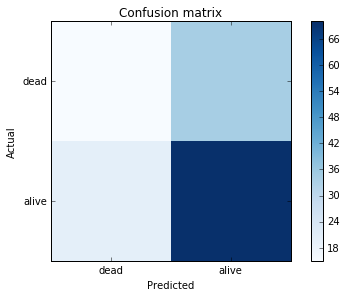

sensitivity (if alive, chance we predicted correctly): 0.777777777778
specificity (if dead, chance we predicted correctly): 0.30612244898


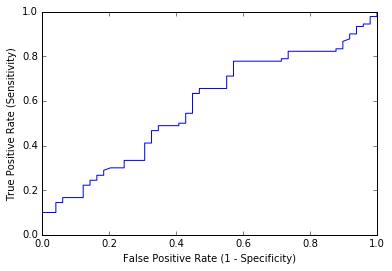

AUC: 0.577097505669
cross_val_score: 0.704886271721


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
preds = logreg.predict(X_test)
probs = logreg.predict_proba(X_test)[:, 1]
SCORE(logreg)

In [ ]:
nb = MultinomialNB()
print cross_val_score(nb, X, y, cv=10).mean()

0.705001202501


accuracy: 0.640287769784
compared to null accuracy rate of: 0.647482014388


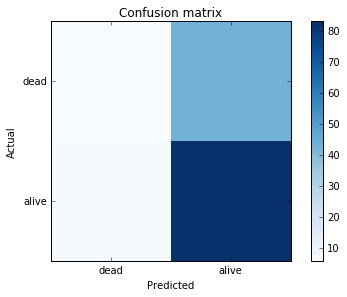

sensitivity (if alive, chance we predicted correctly): 0.922222222222
specificity (if dead, chance we predicted correctly): 0.122448979592


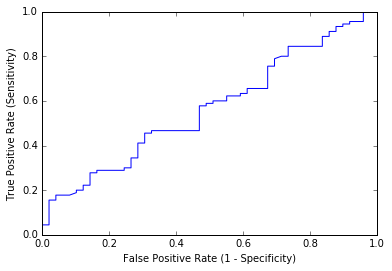

AUC: 0.566213151927
cross_val_score: 0.694541484209


In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
probs = nb.predict_proba(X_test)[:, 1]
SCORE(nb)

In [ ]:
# Try splitting the data more times
lg = LogisticRegression()
logval = cross_val_score(lg, X, y, cv=100).mean()
print logval

nb = MultinomialNB()
nbval = cross_val_score(nb, X, y, cv=100).mean()
print nbval

ln = LinearRegression()
lrval = np.sqrt(abs(cross_val_score(ln, X, y, cv=100, scoring='mean_squared_error').mean()))
print lrval

0.692666666667
0.7085
0.438813572788


In [ ]:
# Decision tree
import pandas as pd
train = df_new

In [ ]:
# before splitting anything, just predict the mean of the entire dataset
train['prediction'] = train.isAlive.mean()

In [ ]:
# calculate RMSE for those predictions
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(train.isAlive, train.prediction))

0.46580256714855517

In [ ]:
train.shape

(553, 26)

In [ ]:
# define X and y
feature_cols = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity']
X = df_new[feature_cols]
y = df_new.isAlive.values

In [ ]:
# instantiate a DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
treereg = DecisionTreeClassifier(max_depth=10, random_state=1)
treereg

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [ ]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='accuracy')
np.mean(scores)

0.71980672835935988

In [ ]:
# try different tree depths
max_depth_range = range(1,15)

# store the average RMSE for each max_depth
RMSE_scores = []

# LOOCV with each max_depth
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='accuracy')
    RMSE_scores.append(np.mean(MSE_scores))
print len(MSE_scores)

14


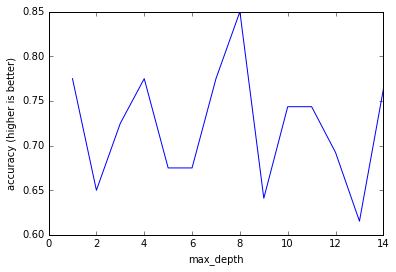

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# plot max_depth (x-axis) vs MSE (y-axis)
plt.plot(max_depth_range, MSE_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy (higher is better)')

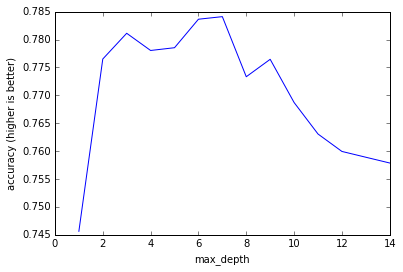

In [ ]:
# try different tree depths
max_depth_range = range(1,15)

# store the average RMSE for each max_depth
RMSE_scores = []

# LOOCV with each max_depth
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(criterion='gini', max_features=10, max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='accuracy')
    RMSE_scores.append(np.mean(MSE_scores))

# plot max_depth (x-axis) vs RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy (higher is better)')

In [ ]:
## ** remember to split the training and test data set ** ##

# instantiate a DecisionTreeClassifier with dept of 12 because that had higheset accuracy
from sklearn.tree import DecisionTreeClassifier
treereg = DecisionTreeClassifier(max_depth=12, random_state=1)
treereg.fit(X, y)
my_prediction = treereg.predict(X)

In [ ]:

# use leave-one-out cross-validation (LOOCV) to estimate the MSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.48819943339391392

In [ ]:
# Gini importance of each feature (normalized total reduction of error brought by that feature)
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
9,popularity,0.489615
4,book4,0.106691
7,isNoble,0.071513
0,male,0.064564
2,book2,0.054246
6,isMarried,0.049795
5,book5,0.048000
3,book3,0.047757
8,numDeadRelations,0.038458
1,book1,0.029361


In [ ]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_GOT.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_GOT.dot -o tree_GOT.png

In [ ]:
# Compare original prediction accuracy
url = '/Users/ibt119/Code/datascienceclass/sfdat22_work/project/character-predictions-9.csv'
df = pd.read_csv(url, sep=',')

((df['alive'] >= .5) == df['isAlive']).mean()

0.72875226039783003

In [ ]:
# random forrest 
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100)
# define X and y
feature_cols = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity']
X = df_new[feature_cols]
y = df_new.isAlive.values
rfclf = rfclf.fit(X, y)

In [ ]:
# Gini importance of each feature (normalized total reduction of error brought by that feature)
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
9,popularity,0.464051
4,book4,0.101480
8,numDeadRelations,0.080580
7,isNoble,0.066166
2,book2,0.065280
0,male,0.055719
3,book3,0.047720
5,book5,0.042061
6,isMarried,0.040858
1,book1,0.036086
